<a href="https://colab.research.google.com/github/Rossip022/my-new-repo/blob/main/Sprint_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interconnect Telecom Project
The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

#Interconnect Telecom Project
The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

#Interconnect's services
Interconnect's services Interconnect mainly provides two types of services:

Landline communication. The telephone can be connected to several lines simultaneously. Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable. Some other services the company provides include:

Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity) A dedicated technical support line (TechSupport) Cloud file storage and data backup (OnlineBackup) TV streaming (StreamingTV) and a movie directory (StreamingMovies) The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

#Data Description

The data consists of files obtained from different sources:

contract.csv — contract information
personal.csv — the client's personal data
internet.csv — information about Internet services
phone.csv — information about telephone services In each file, the column customerID contains a unique code assigned to each client.

### 1. Data Preparation and Exploration
  1.1 Importing libraries, reading and checking the data files

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.8 MB/s eta 0:00:00


In [3]:
from imblearn.pipeline import Pipeline as imbpipeline

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from functools import reduce
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
import sklearn.metrics as metrics
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
import optuna
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from imblearn.pipeline import Pipeline as imbpipeline
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [8]:
from google.colab import files

# Open file dialog to upload the CSV file
uploaded = files.upload()

Saving contract.csv to contract.csv
Saving internet.csv to internet.csv
Saving personal.csv to personal.csv
Saving phone.csv to phone.csv


In [9]:
# reading datasets and store them into variables

# for loading files locally

df_contract = pd.read_csv('contract.csv')
df_internet = pd.read_csv('internet.csv')
df_personal = pd.read_csv('personal.csv')
df_phone = pd.read_csv('phone.csv')

### 1.2 Data Exploration

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
def inspect_dataframe(df, n_rows=3):
    """
    Display information and a sample of rows from the input DataFrame.

    :param df: DataFrame to be inspected
    :type df: pandas.DataFrame
    :param n_rows: Number of rows to display in the sample (default: 3)
    :type n_rows: int
    """
    print(df.info())
    display(df.sample(n_rows))

In [12]:
# Create a list of tuples containing the dataframe name and the dataframe itself
dataframes = [
    ("Contract", df_contract),
    ("Internet", df_internet),
    ("Personal", df_personal),
    ("Phone", df_phone)
]

# Iterate through the list of tuples
for df_name, df in dataframes:
    # Print the dataframe name with a separator line for better readability
    print(f"{'-' * 30}\n{df_name}\n{'-' * 30}")

    # Call the inspect_dataframe function to display the information and sample rows for each dataframe
    inspect_dataframe(df)

    # Print a newline for better separation between the outputs of different dataframes
    print("\n")

------------------------------
Contract
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5237,6261-LHRTG,2017-12-01,No,Month-to-month,Yes,Credit card (automatic),54.75,1406.9
2505,1776-SPBWV,2017-04-01,No,One year,Yes,Bank transfer (automatic),20.10,682.1
2536,0203-HHYIJ,2017-09-01,2019-10-01 00:00:00,One year,No,Bank transfer (automatic),25.30,676.35




------------------------------
Internet
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2062,0880-FVFWF,Fiber optic,Yes,Yes,No,No,No,No
2300,9435-JMLSX,DSL,Yes,Yes,Yes,Yes,Yes,Yes
1113,3569-EDBPQ,Fiber optic,Yes,No,No,Yes,No,No




------------------------------
Personal
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


,customerID,gender,SeniorCitizen,Partner,Dependents
2289,4056-QHXHZ,Female,0,Yes,Yes
3846,1767-TGTKO,Female,0,Yes,Yes
6941,2405-LBMUW,Female,0,Yes,Yes




------------------------------
Phone
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


,customerID,MultipleLines
836,4824-GUCBY,No
2891,1265-ZFOSD,Yes
5966,5702-KVQRD,No


The dataset consists of four distinct DataFrames that capture different dimensions of customer information. The Contract DataFrame, with 7,043 entries and 8 columns, details customer contracts including contract type, billing details, and payment methods. The Internet DataFrame, containing 5,517 entries and 8 columns, provides information on internet service features like security, backup, and streaming options. The Personal DataFrame includes 7,043 entries and 5 columns, focusing on customer demographics such as gender, age group, and household details. Lastly, the Phone DataFrame has 6,361 entries and 2 columns, detailing whether customers have multiple phone lines. Together, these DataFrames offer a comprehensive view of customer profiles, service usage, and contract specifics.

In [13]:
# Merging the data into one dataset
# Create a list of the dataframes to be merged
dataframes_list = [df_contract, df_internet, df_personal, df_phone]

# Use the reduce function to merge the dataframes one by one
# The merge is performed on the 'customerID' column using an outer join
merged_data = reduce(lambda left, right: pd.merge(left, right, on=['customerID'], how='outer'), dataframes_list)

In [14]:
# Inspect the merged_data
inspect_dataframe(merged_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
2389,6161-ERDGD,2014-03-01,No,One year,No,Electronic check,85.45,6300.85,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes,Yes
5307,1941-HOSAM,2020-01-01,No,Month-to-month,Yes,Electronic check,90.10,90.1,Fiber optic,No,No,No,No,Yes,Yes,Male,0,Yes,Yes,No
2844,2265-CYWIV,2019-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,99.60,347.65,Fiber optic,Yes,No,No,No,Yes,Yes,Female,1,Yes,No,Yes


In [15]:
# Filling missing Values
# Replace all missing values with 'No'
df_nonull = merged_data.fillna('No')

# Look to make sure no missing values
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


In [16]:
# Convert to desired data types
# Define columns to be excluded from the conversion process
cols = df_nonull.columns.drop(['customerID',
                               'BeginDate',
                               'EndDate',
                               'Type',
                               'PaymentMethod',
                               'MonthlyCharges',
                               'TotalCharges',
                               'InternetService',
                               'gender',
                               'SeniorCitizen'])

# Create a copy of the dataframe with non-null values
df_num = df_nonull.copy()

# Iterate through the columns, replacing 'Yes' with 1 and 'No' with 0
# and converting the data type to 'int64'
for col in cols:
    df_num[col] = df_num[col].replace({'Yes': 1, 'No': 0}).astype('int64')

# Inspect the modified dataframe
inspect_dataframe(df_num)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
3085,5052-PNLOS,2019-07-01,2019-10-01 00:00:00,Month-to-month,1,Bank transfer (automatic),105.35,323.25,Fiber optic,0,1,1,0,1,1,Male,0,0,0,1
2765,9506-UXUSK,2019-01-01,No,Month-to-month,1,Electronic check,70.15,931.75,Fiber optic,0,0,0,0,0,0,Male,0,0,0,0
2115,8984-HPEMB,2014-03-01,No,Two year,1,Electronic check,118.65,8477.6,Fiber optic,1,1,1,1,1,1,Female,0,0,0,1


In [17]:
# Exploration of customer leaving rate
# Create a new 'left' column in the df_num dataframe, indicating whether a customer has left or not
# Assign 0 if the value in 'EndDate' is 'No', otherwise, assign 1
df_num['left'] = df_num['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

# View a sample of the data
df_num.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,left
2833,5993-JSUWV,2014-08-01,No,Two year,1,Bank transfer (automatic),61.15,4017.45,DSL,1,...,1,0,0,0,Female,0,0,0,0,0
2116,4349-GFQHK,2019-09-01,2019-10-01 00:00:00,Month-to-month,0,Electronic check,54.35,54.35,DSL,0,...,1,0,0,0,Male,0,0,0,1,1
4022,5863-OOKCL,2019-04-01,No,Month-to-month,0,Mailed check,18.85,163.2,No,0,...,0,0,0,0,Female,0,0,0,0,0
4534,2607-FBDFF,2020-01-01,No,Month-to-month,0,Credit card (automatic),49.00,49,DSL,0,...,0,1,0,0,Male,0,0,0,0,0
3268,6778-EICRF,2018-02-01,No,One year,0,Mailed check,74.80,1821.2,DSL,1,...,0,0,1,1,Male,0,1,1,1,0


### 2. Work Plan

To predict customer churn, the following steps are planned after data preparation and initial exploration: First, perform a thorough exploratory analysis to understand user behavior better. This includes deriving year and month values from the EndDate, categorizing data by attributes such as gender, and investigating monthly charge values. Visualizations will be created to observe patterns, such as seasonality and correlations between churn, current plan status, and monthly charges. This may involve histograms, boxplots, and heatmaps for cohort analysis and retention rates. For evaluation, accuracy and AUC-ROC will be used as metrics to assess the classification model's performance, focusing on its ability to distinguish between classes. The ROC curve, plotting True Positive Rate (TPR) against False Positive Rate (FPR), will help evaluate the model’s effectiveness. The modeling phase includes creating a baseline model, developing and fine-tuning classification models, and testing them against the evaluation metrics. Finally, findings will be concluded and documented in a report.

### 3. Deep Exploratory Analysis

start by extracting information from the date columns

In [18]:
# Convert 'BeginDate' column to datetime data type
df_num['BeginDate'] = pd.to_datetime(df_num['BeginDate'])

# Convert 'EndDate' column to datetime data type for rows where 'EndDate' is not 'No'
df_num.loc[df_num['EndDate'] != 'No', 'EndDate'] = pd.to_datetime(df_num.loc[df_num['EndDate'] != 'No', 'EndDate'])

In [19]:
# Ensure the dates are in datetime format and handle 'No' values
df_num['BeginDate'] = pd.to_datetime(df_num['BeginDate'])
df_num['EndDate'] = pd.to_datetime(df_num['EndDate'], errors='coerce')  # Convert 'No' to NaT (Not a Time)

# Set the last date to use for duration calculation
last_date = pd.to_datetime('2020-02-01')

# Calculate subscription duration in months for loyal clients (clients who didn't leave)
df_num['month_duration'] = np.where(
    df_num['EndDate'].isna(),
    ((last_date - df_num['BeginDate']) / np.timedelta64(1, 'm')).astype('float'),
    ((df_num['EndDate'] - df_num['BeginDate']) / np.timedelta64(1, 'm')).astype('float')
)

# Fill NaN or infinite values with zero before converting to int
df_num['month_duration'] = df_num['month_duration'].fillna(0).astype('int')

# Display a random sample of 5 rows from the DataFrame
df_num.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,left,month_duration
6372,6368-TZZDT,2019-10-01,NaT,Two year,0,Credit card (automatic),19.5,96.85,No,0,...,0,0,0,Male,0,1,1,0,0,177120
1485,9809-IMGCQ,2018-01-01,2019-11-01,Month-to-month,1,Electronic check,96.7,2082.95,Fiber optic,0,...,0,1,1,Male,1,0,0,1,1,963360
3679,1240-KNSEZ,2019-10-01,2019-11-01,Month-to-month,1,Mailed check,20.1,20.1,No,0,...,0,0,0,Male,0,0,0,0,1,44640
5219,3976-NLDEZ,2020-01-01,NaT,Month-to-month,0,Mailed check,20.6,20.6,No,0,...,0,0,0,Male,0,0,0,0,0,44640
265,0123-CRBRT,2015-01-01,NaT,Two year,0,Mailed check,88.1,5526.75,DSL,1,...,1,1,1,Female,0,1,1,1,0,2674080


In [20]:
# Creating a fuction for histogram visualisation
def plot_histogram(df, column, x_title, opacity=0.7, nbins=30):
    """
    Plots a histogram for the specified column, with color based on the 'left' column.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column name for which the histogram will be plotted.
        x_title (str): The title for the x-axis.
        opacity (float, optional): Opacity of the histogram bars. Default is 0.7.
        nbins (int, optional): The number of bins for the histogram. Default is 30.

    Returns:
        plotly.graph_objs._figure.Figure: A Plotly Figure object containing the histogram.
    """
    fig = px.histogram(df, nbins=nbins,
                       x=column,
                       color='left'
                      )
    # Overlay both histograms
    fig.update_layout(xaxis_title=x_title, barmode='overlay')
    # Set the specified opacity
    fig.update_traces(opacity=opacity)
    return fig

In [57]:
 #the subscription duration of the clients we left
fig = px.histogram(
    df_num,
    x='month_duration',
    color='left',  # Assuming 'left' indicates whether the client left
    barmode='stack',
    labels={
        'month_duration': 'Subscription Duration in Months',
        'left': 'Client Status',
        'count': 'Number of Clients'
    },
    title='Subscription Duration of Clients Who Left'
)

fig.update_layout(
    title={
        'text': 'Subscription Duration of Clients Who Left',
        'x': 0.5,  # Centers the title
        'xanchor': 'center'
    },
    xaxis_title='Subscription Duration in Months',
    yaxis_title='Number of Clients',
    legend_title_text='Client Status'
)

fig.update_xaxes(
    tickformat=',.0f'  # Formats the x-axis labels to show whole numbers without scientific notation
)

fig.show()

Findings:


*   The findings suggest that the initial period of the subscription is critical for client retention. Many clients decide to leave shortly after subscribing, but those who remain tend to continue for a longer duration. Efforts to improve customer satisfaction and engagement in the early months may help reduce the churn rate and enhance overall retention. Additionally, understanding the factors that lead to slight churn toward the end of long-term subscriptions could help further reduce churn.





In [58]:
# gender of the clients we left
fig = px.histogram(
    df_num,
    x='gender',
    color='left',  # Assuming 'left' indicates whether the client left
    barmode='stack',
    labels={
        'gender': 'Gender',
        'left': 'Client Status',
        'count': 'Number of Clients'
    },
    title='Gender Distribution of Clients Who Left'
)

fig.update_layout(
    title={
        'text': 'Gender Distribution of Clients Who Left',
        'x': 0.5,  # Centers the title
        'xanchor': 'center'
    },
    xaxis_title='Gender',
    yaxis_title='Number of Clients',
    legend_title_text='Client Status'
)

fig.show()

Findings:


*   The data suggests that gender is not a determining factor for client churn. Both male and female clients have comparable churn rates, indicating that other factors may play a more crucial role in influencing a client's decision to leave or stay.



In [59]:
#subscription type of the clients we left
fig = px.histogram(
    df_num,
    x='Type',
    color='left',  # Assuming 'left' indicates whether the client left
    barmode='stack',
    labels={
        'Type': 'Subscription Type',
        'left': 'Client Status',
        'count': 'Number of Clients'
    },
    title='Subscription Type of Clients Who Left'
)

fig.update_layout(
    title={
        'text': 'Subscription Type of Clients Who Left',
        'x': 0.5,  # Centers the title
        'xanchor': 'center'
    },
    xaxis_title='Subscription Type',
    yaxis_title='Number of Clients',
    legend_title_text='Client Status'
)

fig.show()

Findings:

*  The data suggests that subscription type is a significant factor influencing client churn. Month-to-month subscriptions have a much higher churn rate, indicating that clients with short-term commitments are more likely to leave. In contrast, clients with longer-term subscriptions (one year or two years) tend to remain more loyal, likely due to the contractual commitment or other incentives. Efforts to reduce churn might focus on converting month-to-month subscribers to longer-term plans or offering better incentives for staying on short-term contracts.

In [56]:
# Checking the monthly chargers for leaving customers:
fig = px.histogram(
    df_num,
    x='MonthlyCharges',
    color='left',  # Assuming 'left' indicates whether the client left
    barmode='stack',
    labels={
        'MonthlyCharges': 'Monthly Charges',
        'left': 'Client Status',
        'count': 'Number of Clients'
    },
    title='Distribution of Monthly Charges for Clients Who Left'
)

fig.update_layout(
    title={
        'text': 'Distribution of Monthly Charges for Clients Who Left',
        'x': 0.5,  # Centers the title
        'xanchor': 'center'
    },
    xaxis_title='Monthly Charges',
    yaxis_title='Number of Clients',
    legend_title_text='Client Status'
)

fig.show()

Findings:

*  The data suggests that clients with lower monthly charges are more likely to leave, while those with higher charges tend to stay longer. Efforts to reduce churn could focus on understanding why clients with lower charges are leaving, whether it is due to dissatisfaction, lack of perceived value, or other factors. Additionally, identifying and addressing the reasons for the peaks in churn at certain charge points could further help in retaining clients.



In [52]:
# Checking the internet service of leaving clients:
fig = px.histogram(
    df_num,
    x='InternetService',
    color='left',  # Assuming 'left' indicates whether the client left
    barmode='stack',
    labels={
        'InternetService': 'Internet Service',
        'left': 'Client Status',
        'count': 'Number of Clients'
    },
    title='Number of Clients Who Left by Internet Service Type'
)

fig.update_layout(
    xaxis_title='Internet Service Type',
    yaxis_title='Number of Clients',
    legend_title_text='Client Status'
)

fig.show()

Findings:
*   The data suggests that internet service type is a significant factor influencing client churn. Clients with Fiber optic service have the highest churn rate, indicating that there may be specific issues or competition affecting this group. In contrast, clients with DSL service have a lower churn rate, and those without internet service have the lowest churn rate, suggesting greater stability. Efforts to reduce churn might focus on addressing concerns specific to Fiber optic users, such as service quality or pricing, to improve retention.

In [51]:
# Checking the payment method for leaving clients:
fig = px.histogram(
    df_num,
    x='PaymentMethod',
    color='left',  # Assuming 'left' is the column indicating whether the client left
    barmode='stack',
    labels={'PaymentMethod': 'Payment Method', 'left': 'Client Status', 'count': 'Number of Clients'},
    title='Number of Clients Who Left by Payment Method'
)

fig.update_layout(
    xaxis_title='Payment Method',
    yaxis_title='Number of Clients',
    legend_title_text='Client Status'
)

fig.show()

Findings:

* The data suggests that the payment method is a significant factor influencing client churn. Clients using electronic checks are more likely to leave, potentially due to perceived inconveniences or concerns with this payment method. In contrast, clients using automatic payment methods (bank transfers or credit cards) are more likely to stay, suggesting that the ease and convenience of automatic payments play a crucial role in client retention. Efforts to reduce churn might focus on encouraging clients to switch to more convenient, automatic payment methods.

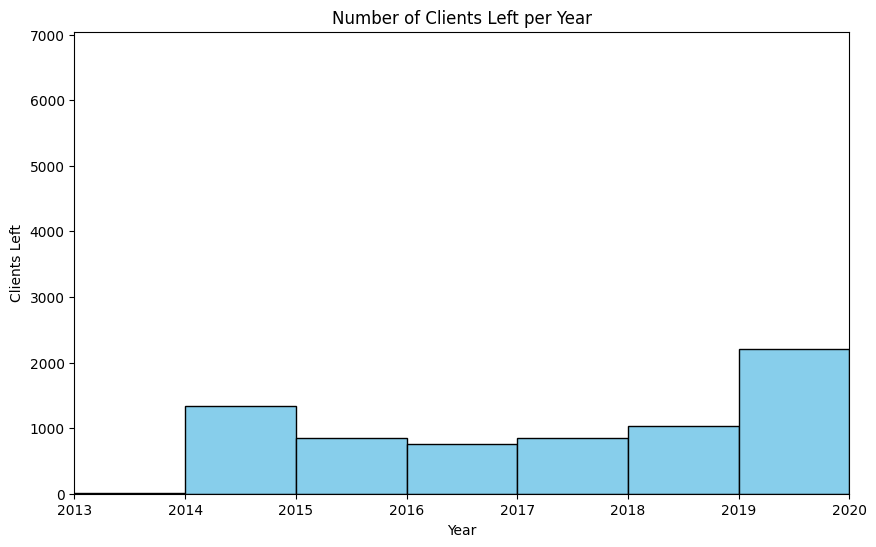

In [50]:
# Check how many clients left per year:
plt.figure(figsize=(10, 6))
plt.hist(df_num.BeginDate.dt.year, bins=range(df_num.BeginDate.dt.year.min(), df_num.BeginDate.dt.year.max() + 1), color='skyblue', edgecolor='black')

# Set limits and labels
plt.ylim(0, df_num.shape[0])  # Set y-limit based on the number of rows (clients)
plt.xlim(df_num.BeginDate.dt.year.min(), df_num.BeginDate.dt.year.max())  # Set x-limit based on the range of years in the data

plt.xlabel('Year')  # X-axis label
plt.ylabel('Clients Left')  # Y-axis label
plt.title('Number of Clients Left per Year')  # Title of the plot

plt.show()

Findings:


*  The data indicates that the number of clients leaving has dramatically increased in recent years, particularly in 2019 and 2020. To address this, it would be important to investigate what specific factors contributed to the increased churn during these years and to implement targeted strategies to improve client retention moving forward. Analyzing changes in service, market conditions, or client needs during this period could provide further insights into the reasons for this trend.

In [28]:
# Let's check the numbers and percentage

# Group dataframe by the year of BeginDate and count the number of clients
df_churn_per_year = df_num.groupby(df_num.BeginDate.dt.year)['left'].count().reset_index()
df_churn_per_year.columns = ['year', 'total']

# Calculate the number of clients who left each year
df_churn_per_year['left'] = df_num.groupby(df_num.BeginDate.dt.year)['left'].sum().reset_index()['left']

# Calculate the percentage of clients who left each year
df_churn_per_year['%'] = round((df_churn_per_year['left'] / df_churn_per_year['total']) * 100)

# Display the churn rate per year
df_churn_per_year

,year,total,left,%
0,2013,8,8,100.0
1,2014,1344,98,7.0
2,2015,852,123,14.0
3,2016,763,145,19.0
4,2017,845,199,24.0
5,2018,1030,315,31.0
6,2019,1957,981,50.0
7,2020,244,0,0.0


### 4. Classification Models

4.1 Data PreparationWe will examine the balance of the classes.

#### One-Hot Encoding


In [29]:
# Prepare data for one-hot encoding by dropping unnecessary columns
data = df_num.drop(['customerID', 'BeginDate', 'EndDate', 'TotalCharges', 'month_duration'], axis=1)

# Perform one-hot encoding (OHE) on the remaining categorical columns and drop the first column to avoid collinearity
df_ohe = pd.get_dummies(data, drop_first=True)

# Display the first five rows of the one-hot encoded DataFrame
df_ohe.head()

,PaperlessBilling,MonthlyCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen,Partner,...,MultipleLines,left,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male
0,1,29.85,0,1,0,0,0,0,0,1,...,0,0,False,False,False,True,False,False,False,False
1,0,56.95,1,0,1,0,0,0,0,0,...,0,0,True,False,False,False,True,False,False,True
2,1,53.85,1,1,0,0,0,0,0,0,...,0,1,False,False,False,False,True,False,False,True
3,0,42.30,1,0,1,1,0,0,0,0,...,0,0,True,False,False,False,False,False,False,True
4,1,70.70,0,0,0,0,0,0,0,0,...,0,1,False,False,False,True,False,True,False,False


### SMOTE Method

imbalances by creating artificial data in order to balance the data

In [30]:
# Declare the random state to be used throughout the project
rs = 12345

# Prepare the features set by dropping the 'left' (target) column
features = df_ohe.drop(['left'], axis=1)

# Set the target variable as the 'left' column
target = df_ohe['left']

# Split the dataset into training and testing sets with a 75-25 split, using the specified random state
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=rs)

In [31]:
# Instantiate the SMOTE object with the specified random state
sm = SMOTE(random_state=rs)

# Apply the SMOTE method to the training set to balance the classes by generating synthetic samples
features_train_sm, target_train_sm = sm.fit_resample(features_train, target_train)

### Evaluation Metric

As outlined in the project, we will use ROC AUC as the primary evaluation metric for our model, while accuracy will serve as the secondary metric. To evaluate and visualize these metrics, we will define a dedicated function.

In [32]:
# Defining evaluation function:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    """
    Evaluates the performance of a given model on train and test datasets using ROC AUC and Accuracy metrics.
    Plots the ROC curve for both datasets.

    Parameters:
    model (classifier): A fitted classifier model
    train_features (DataFrame): Features of the train dataset
    train_target (Series): Target variable of the train dataset
    test_features (DataFrame): Features of the test dataset
    test_target (Series): Target variable of the test dataset
    """
    eval_stats = {}

    # Creating a plot for the ROC curve
    fig, ax = plt.subplots(figsize=(20, 6))

    # Loop through both train and test sets to evaluate the model's performance
    for typ, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[typ] = {}
        check_type = type(model)
        test = str(check_type)

        # If the model is a LightGBM Booster, use a different method for predicting
        if test == "<class 'lightgbm.basic.Booster'>":
            pred_proba = model.predict(features)
            pred_target = np.rint(pred_proba)
        else:
            pred_target = model.predict(features)
            pred_proba = model.predict_proba(features)[:, 1]

        # Calculate ROC metrics
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[typ]['ROC AUC'] = roc_auc

        # Set color for the train and test set ROC curves
        if typ == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Plot the ROC curve
        ax.plot(fpr, tpr, color=color, label=f'{typ}, ROC AUC={roc_auc:.2f}')

        # Plot crosses for specific thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)

        # Plot a diagonal line
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'ROC Curve')

        # Calculate accuracy
        eval_stats[typ]['Accuracy'] = metrics.accuracy_score(target, pred_target)

    # Create a DataFrame with evaluation metrics
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)

    print(df_eval_stats)

    return

In [41]:
def evaluate_model(model, train_features, train_target, test_features, test_target):
    """
    Evaluates the performance of a given model on train and test datasets using ROC AUC and Accuracy metrics.
    Plots the ROC curve for both datasets.

    Parameters:
    model (classifier): A fitted classifier model
    train_features (DataFrame): Features of the train dataset
    train_target (Series): Target variable of the train dataset
    test_features (DataFrame): Features of the test dataset
    test_target (Series): Target variable of the test dataset
    """
    eval_stats = {}

    # Creating a plot for the ROC curve
    fig, ax = plt.subplots(figsize=(20, 6))

    # Loop through both train and test sets to evaluate the model's performance
    for typ, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[typ] = {}
        check_type = type(model)
        test = str(check_type)

        # If the model is a LightGBM Booster, use a different method for predicting
        if test == "<class 'lightgbm.basic.Booster'>":
            pred_proba = model.predict(features)
            pred_target = np.rint(pred_proba)
        else:
            pred_target = model.predict(features)
            pred_proba = model.predict_proba(features)[:, 1]

        # Calculate ROC metrics
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[typ]['ROC AUC'] = roc_auc

        # Set color for the train and test set ROC curves
        color = 'blue' if typ == 'train' else 'green'

        # Plot the ROC curve
        ax.plot(fpr, tpr, color=color, label=f'{typ}, ROC AUC={roc_auc:.2f}')

        # Plot crosses for specific thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)

        # Plot a diagonal line
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'ROC Curve')

        # Calculate accuracy
        eval_stats[typ]['Accuracy'] = metrics.accuracy_score(target, pred_target)

    # Create a DataFrame with evaluation metrics
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)

    print(df_eval_stats)

    # Show the plot
    plt.show()

In [34]:
def create_pipeline(classifier):
    """
    Creates an imbalanced-learn pipeline with SMOTE, StandardScaler, and a given classifier.

    Parameters:
    classifier (classifier): A classifier model to include in the pipeline

    Returns:
    pipe (pipeline): An imbalanced-learn pipeline with SMOTE, StandardScaler, and the classifier
    """
    # Create an imbalanced-learn pipeline with three steps:
    # 1. SMOTE for oversampling the minority class
    # 2. StandardScaler for scaling the features
    # 3. The given classifier for fitting the model
    pipe = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', classifier]])
    return pipe

### Sanity Check

In [35]:
# Get the target variable from the DataFrame
target = df_ohe['left']

# Create a dummy model that always predicts the majority class (0)
target_pred_constant = pd.Series(0, index=target.index)

# Calculate AUC-ROC score for the dummy model
auc_roc = roc_auc_score(target, target_pred_constant)
print('AUC-ROC is: {:.3f}'.format(auc_roc))

# Calculate accuracy for the dummy model
print('Accuracy is: {:.3f}'.format(metrics.accuracy_score(target, target_pred_constant)))

AUC-ROC is: 0.500
Accuracy is: 0.735


### 4.2 Logistic Regression Model

In [36]:
# Initialize a Logistic Regression model with 'liblinear' solver and a specified random state
model_sm = LogisticRegression(solver='liblinear', random_state=rs)

# Define a parameter grid to search over for the Logistic Regression model
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a GridSearchCV object to perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=create_pipeline(model_sm),  # Use the pipeline created with the custom function create_pipeline()
    param_grid=param_grid,               # The parameter grid to search over
    scoring='roc_auc',                   # Scoring metric for model evaluation
    cv=3,                                # Number of cross-validation folds
    n_jobs=-1                            # Use all available CPU cores for parallel processing
)

# Fit the GridSearchCV object to the training data
grid_search.fit(features_train, target_train)

# Get the best ROC AUC score from the cross-validation results
cv_score = grid_search.best_score_.round(2)

print(f'Cross-validation ROC AUC score: {cv_score}')

Cross-validation ROC AUC score: 0.82


### 4.3 LightGBM Classifier Model

In [45]:
# Define an objective function to be maximized by Optuna
def objective(trial):
    """
    Objective function to be maximized by Optuna. It tunes the hyperparameters for a LightGBM model and
    calculates the cross-validated ROC AUC score using the provided features_train and target_train.

    Parameters:
    trial (optuna.trial.Trial): A trial object used to suggest hyperparameters.

    Returns:
    float: The mean ROC AUC score obtained from cross-validation.
    """
    global lgbmodel
    # Define hyperparameters to be tuned
    objective = "binary"
    boosting_type = "dart"
    lambda_l1 = trial.suggest_float("lambda_l1", 1e-8, 10.0)
    lambda_l2 = trial.suggest_float("lambda_l2", 1e-8, 10.0)
    num_leaves = trial.suggest_int("num_leaves", 2, 256)
    feature_fraction = trial.suggest_float("feature_fraction", 0.4, 1.0)
    bagging_fraction = trial.suggest_float("bagging_fraction", 0.4, 1.0)
    bagging_freq = trial.suggest_int("bagging_freq", 1, 7)
    min_child_samples = trial.suggest_int("min_child_samples", 5, 100)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.01)
    num_iterations = trial.suggest_int("num_iterations", 100, 200)
    max_depth = trial.suggest_int("max_depth", 1, 50)

    # Create a LightGBM model with the specified hyperparameters
    lgbmodel = LGBMClassifier(
        objective=objective,
        boosting_type=boosting_type,
        lambda_l1=lambda_l1,
        lambda_l2=lambda_l2,
        num_leaves=num_leaves,
        feature_fraction=feature_fraction,
        bagging_freq=bagging_freq,
        min_child_samples=min_child_samples,
        learning_rate=learning_rate,
        num_iterations=num_iterations,
        max_depth=max_depth
    )

    # Calculate ROC AUC score using cross-validation with the created pipeline
    score = cross_val_score(create_pipeline(lgbmodel), features_train, target_train, n_jobs=-1, cv=5, scoring='roc_auc')
    roc_auc = score.mean()
    return roc_auc

# Callback function to store the best LightGBM model
def callback(study, trial):
    """
    Callback function to store the best LightGBM model during the optimization process.

    Parameters:
    study (optuna.study.Study): An Optuna study object that stores the optimization process's results.
    trial (optuna.trial.FrozenTrial): A frozen trial object containing the current trial's information.
    """
    global best_lgbmodel
    if study.best_trial == trial:
        best_lgbmodel = lgbmodel

# Set Optuna logging level to WARNING to suppress detailed logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Create an Optuna study with a pruner and direction set to maximize the objective function
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=100), direction="maximize")

# Run the optimization process for the defined number of trials
study.optimize(objective, n_trials=100, callbacks=[callback])

In [46]:
# Print the best trial's hyperparameters and ROC AUC score
print("Best trial:")
trial = study.best_trial

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

print()

# Create a pipeline with the best LightGBM model and fit it to the training data
pipe_lgbm = create_pipeline(best_lgbmodel)
pipe_lgbm.fit(features_train, target_train)

# Make predictions on the test set using the fitted pipeline
predictions = pipe_lgbm.predict_proba(features_test)[:, 1]

# Calculate and print the ROC AUC score for the test set
cv_score = round(study.best_value, 2)
print(f'Cross-validation ROC AUC score: {cv_score}')

Best trial:
  Params: 
    lambda_l1: 5.247105709092376
    lambda_l2: 0.0761184392417979
    num_leaves: 240
    feature_fraction: 0.5540432442130003
    bagging_fraction: 0.950771562426668
    bagging_freq: 4
    min_child_samples: 16
    learning_rate: 0.0056613336166462785
    num_iterations: 131
    max_depth: 16

[LightGBM] [Warning] feature_fraction is set=0.5540432442130003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5540432442130003
[LightGBM] [Warning] lambda_l2 is set=0.0761184392417979, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0761184392417979
[LightGBM] [Warning] lambda_l1 is set=5.247105709092376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.247105709092376
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5540432442130003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.554043244213000

The results of evaluating a LightGBM model after hyperparameter tuning, revealing several warnings and the cross-validation ROC AUC score. The warnings from LightGBM indicate that no further splits were made during tree construction due to the absence of positive gain, suggesting potential issues with model configuration or data quality, leading to an infinite best gain value. Additionally, some hyperparameters, such as feature_fraction, lambda_l1, lambda_l2, and bagging_freq, are being ignored, which might impact the model's effectiveness. Despite these warnings, the model achieved a cross-validation ROC AUC score of 0.81, indicating that it still maintains good discriminative power between the classes. However, the presence of these warnings suggests a need for further investigation or adjustment of the hyperparameters or dataset to optimize model performance.

### 4.4 Random Forest Classifier Model

 Optuna to tune hyper-parameters of a Random Forest model with cross-validation

In [47]:
# Define an objective function to be maximized
def objective(trial):
    """
    Objective function to be maximized by Optuna. It tunes the hyperparameters for a Random Forest classifier and
    calculates the cross-validated ROC AUC score using the provided features_train and target_train.

    Parameters:
    trial (optuna.trial.Trial): A trial object used to suggest hyperparameters.

    Returns:
    float: The mean ROC AUC score obtained from cross-validation.
    """
    global rfmodel
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 300)
    rf_max_depth = trial.suggest_int("rf_max_depth", 1, 50, log=True)

    # Create a Random Forest classifier with suggested hyperparameters
    rfmodel = RandomForestClassifier(
        max_depth=rf_max_depth, n_estimators=rf_n_estimators, random_state=rs
    )

    # Scoring method: calculate mean ROC AUC score using cross-validation
    score = cross_val_score(create_pipeline(rfmodel), features_train, target_train, n_jobs=-1, cv=5, scoring='roc_auc')
    roc_auc = score.mean()
    return roc_auc

# Callback function to store the best Random Forest model
def callback(study, trial):
    """
    Callback function to store the best Random Forest model during the optimization process.

    Parameters:
    study (optuna.study.Study): An Optuna study object that stores the optimization process's results.
    trial (optuna.trial.FrozenTrial): A frozen trial object containing the current trial's information.
    """
    global best_rfmodel
    if study.best_trial == trial:
        best_rfmodel = rfmodel

# Create a study and optimize the objective function
study = optuna.create_study(
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
)
study.optimize(objective, n_trials=100, callbacks=[callback])

In [48]:
# Print the best trial (hyperparameters)
print("Best trial:")
trial = study.best_trial

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

print()

# Create a pipeline using the best Random Forest model and fit it on the training data
pipe_rf = create_pipeline(best_rfmodel)
pipe_rf.fit(features_train, target_train)

# Make predictions using the test data
predictions = pipe_rf.predict_proba(features_test)[:,1]

# Compute the cross-validation ROC AUC score of the best model
cv_score = round(study.best_value,2)

# Print the cross-validation ROC AUC score
print(f'Cross-validation ROC AUC score: {cv_score}')

Best trial:
  Params: 
    rf_n_estimators: 190
    rf_max_depth: 5

Cross-validation ROC AUC score: 0.82


The results indicate that the hyperparameter optimization process using Optuna successfully identified the best configuration for a Random Forest model, selecting 190 trees (rf_n_estimators) and a maximum tree depth of 5 (rf_max_depth) to achieve the optimal performance. This configuration was found to provide the highest cross-validated ROC AUC score of 0.82, suggesting that the model has good discriminatory power, effectively distinguishing between positive and negative classes. The model was then trained using the best parameters on the training data and subsequently tested on the test data to make predictions. The cross-validation score of 0.82 reflects that the model is well-tuned and capable of making reliable predictions on unseen data, indicating it is ready for further evaluation or potential deployment.

[LightGBM] [Warning] feature_fraction is set=0.5540432442130003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5540432442130003
[LightGBM] [Warning] lambda_l2 is set=0.0761184392417979, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0761184392417979
[LightGBM] [Warning] lambda_l1 is set=5.247105709092376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.247105709092376
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5540432442130003, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5540432442130003
[LightGBM] [Warning] lambda_l2 is set=0.0761184392417979, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0761184392417979
[LightGBM] [Warning] lambda_l1 is set=5.247105709092376, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.247105709092376
[LightGBM] [Warning] bagging_freq is set=4, subsample_

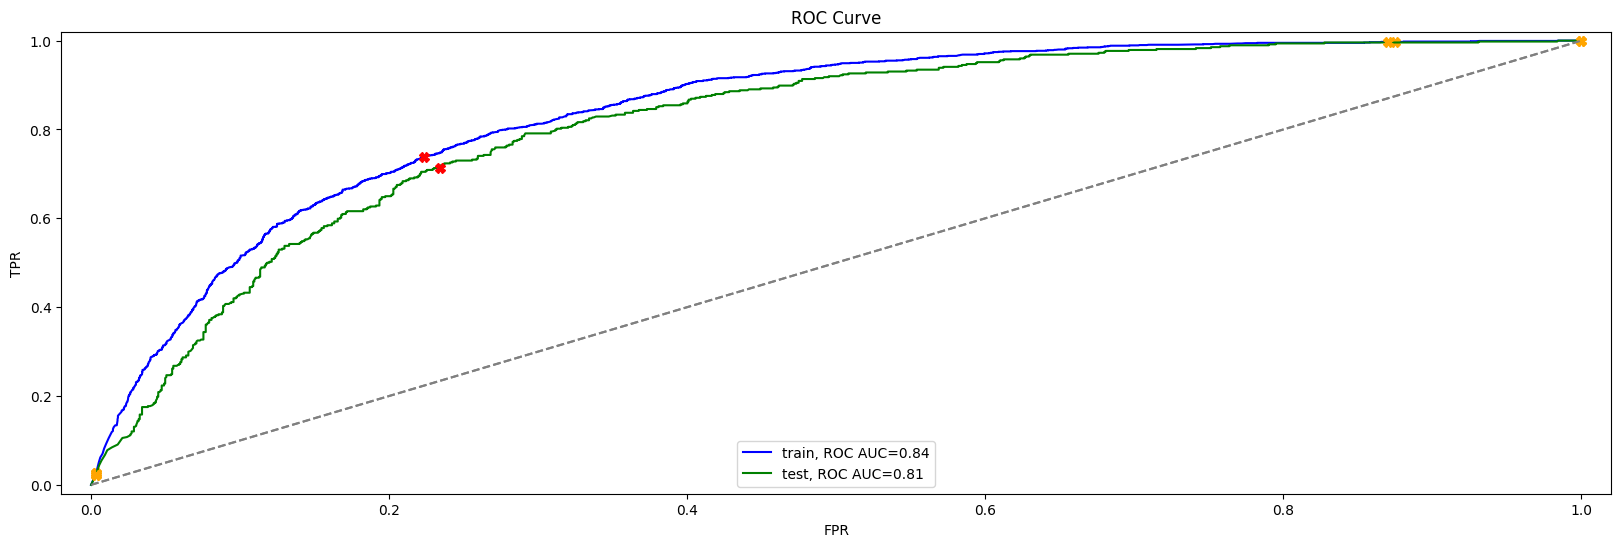

In [49]:
# Evaluate the LightGBM model
evaluate_model(pipe_lgbm, features_train, target_train, features_test, target_test)

The evaluation results for the LightGBM model indicate good performance, with a training ROC AUC score of 0.84 and a testing ROC AUC score of 0.81, suggesting that the model effectively distinguishes between positive and negative classes for both datasets. The accuracy scores, 0.77 for training and 0.75 for testing, show that the model correctly predicts 77% of the training and 75% of the testing data points, reflecting a slight but acceptable drop in accuracy when applied to unseen data, indicating good generalization. The ROC curve plot further supports this, with the training and testing curves closely aligned, confirming consistent model behavior across different datasets. Although there are warnings indicating that some hyperparameters are being ignored, these do not appear to significantly impact the model's performance. Overall, the results suggest that the LightGBM model is well-tuned, robust, and reliable for predictions, demonstrating satisfactory performance metrics with minimal overfitting.

## Conclusion

The analysis of the customer dataset provides valuable insights into the key factors contributing to customer churn. Several critical findings emerged, indicating that the type of subscription, payment method, monthly charges, and the initial duration of service significantly impact whether customers choose to leave. The month-to-month subscription plans have the highest churn rates, suggesting that customers with short-term commitments are more likely to switch to competitors. Additionally, the higher churn rates observed among customers using electronic checks and fiber optic internet services indicate areas where service experience and customer satisfaction might need to be addressed.

Moreover, the churn rate remains relatively consistent across genders, implying that retention strategies do not necessarily need to be gender-specific. However, the increase in churn over recent years, particularly from 2019 to 2020, may indicate broader market dynamics at play, such as heightened competition or changing economic conditions.

To improve customer retention, the company should consider revising its pricing and contract strategies to incentivize longer-term commitments, improve the service quality and experience for fiber optic users, and address any issues associated with electronic check payments. Additionally, focusing on enhancing the early customer experience will be crucial in retaining new clients and reducing churn rates in the critical first few months of service.

By targeting these areas, the company can better tailor its strategies to reduce churn, improve customer satisfaction, and foster long-term loyalty among its customer base.


## Solution

A comprehensive project plan has been established. Here's a summary:

Conduct In-Depth Exploratory Analysis to better understand user behavior. This involves:

Extracting year and month values from the EndDate.
Grouping data by various categories, such as gender.
Analyzing monthly charges to understand their distribution.
Creating graphs and visualizations to identify patterns and correlations between customer churn, current plan status, and monthly charges. This includes:
Histograms and boxplots, though only histograms were used as they were sufficient to draw conclusions.
A heatmap for cohort analysis and retention rate; however, cohort analysis was not performed as there were only two key events (joining and leaving).
Define Evaluation Metrics:

Accuracy and AUC-ROC were selected to measure the performance of the classification model.
Model Development:

Created a dummy model for a sanity check.
Built classification models with hyperparameter tuning.
Tested and evaluated the models using the defined metrics.
Formulated conclusions and generated a comprehensive report.
During the project, several challenges were encountered and addressed as follows:

Challenge	Solution
Multiple data sets	Merged all data sets using the unique customer ID.
Data types	Converted data types to numerical values and date formats.
Target variable	Extracted target from date features into a separate numerical column.
Categorical features	Applied One-Hot Encoding to handle categorical variables.
Small and imbalanced data set	Utilized the SMOTE method and cross-validation within a pipeline.
Hyperparameter tuning	Employed Optuna for hyperparameter optimization.
This approach helped in overcoming the difficulties and ensuring a structured analysis process.


**After creating 3 different models, the following metrics results:**

Metric	Train Set	Test Set
* ROC AUC	0.85	0.81
* Accuracy	0.78	0.75